<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/Face_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [14]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI_project/Face/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Dung'):
    output = 0
  if file.startswith('Ha'):
    output = 1
  if file.startswith('Hakiet'):
    output = 2
  if file.startswith('Hau'):
    output = 3
  if file.startswith('Hieu'):
    output = 4
  if file.startswith('Hoaiphong'):
    output = 5
  if file.startswith('Hoang'):
    output = 6
  if file.startswith('Huulong'):
    output = 7
  if file.startswith('Huynhhuy'):
    output = 8
  if file.startswith('Khoa'):
    output = 9
  if file.startswith('Khuong'):
    output = 10
  if file.startswith('Kiet'):
    output = 11
  if file.startswith('Kyanh'):
    output = 12
  if file.startswith('Loc'):
    output = 13
  if file.startswith('Luan'):
    output = 14
  if file.startswith('Minh'):
    output = 15
  if file.startswith('Ngocthach'):
    output = 16
  if file.startswith('Nhathuy'):
    output = 17
  if file.startswith('Phat'):
    output = 18
  if file.startswith('Phuc'):
    output = 19
  if file.startswith('Quanghuy'):
    output = 20
  if file.startswith('Quangphuc'):
    output = 21
  if file.startswith('Sang'):
    output = 22
  if file.startswith('Sontung'):
    output = 23
  if file.startswith('Tandat'):
    output = 24
  if file.startswith('Tanloc'):
    output = 25
  if file.startswith('Thai'):
    output = 26
  if file.startswith('Thang'):
    output = 27
  if file.startswith('Thanh'):
    output = 28
  if file.startswith('Thao'):
    output = 29
  if file.startswith('Thinh'):
    output = 30
  if file.startswith('Tien'):
    output = 31
  if file.startswith('Trong'):
    output = 32
  if file.startswith('Tuankiet'):
    output = 33
  if file.startswith('Van'):
    output = 34
  if file.startswith('Vuthach'):
    output = 35
  photo = load_img(folder + file, target_size=(40, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_project/AI_Lesson/Face/Face_photos.npy', photos)
save('/content/drive/MyDrive/AI_project/AI_Lesson/Face/Face_labels.npy', labels)

(2093, 40, 40, 3) (2093,)


In [50]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI_project/AI_Lesson/Face/Face_photos.npy')
labels = np.load('/content/drive/MyDrive/AI_project/AI_Lesson/Face/Face_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [51]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (40,40,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_33 (Conv2D)          (None, 10, 10, 64)       

In [52]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [56]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=50,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

Epoch 1/50


<ipython-input-56-160adf4ba619>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


23/23 [==============================] - 9s 365ms/step - loss: 0.1578 - accuracy: 0.9447 - val_loss: 0.1369 - val_accuracy: 0.9650
Epoch 2/50
23/23 [==============================] - 8s 358ms/step - loss: 0.1488 - accuracy: 0.9509 - val_loss: 0.1108 - val_accuracy: 0.9697
Epoch 3/50
23/23 [==============================] - 7s 301ms/step - loss: 0.1026 - accuracy: 0.9768 - val_loss: 0.1011 - val_accuracy: 0.9634
Epoch 4/50
23/23 [==============================] - 7s 302ms/step - loss: 0.0974 - accuracy: 0.9727 - val_loss: 0.0732 - val_accuracy: 0.9713
Epoch 5/50
23/23 [==============================] - 7s 300ms/step - loss: 0.1012 - accuracy: 0.9659 - val_loss: 0.1076 - val_accuracy: 0.9793
Epoch 6/50
23/23 [==============================] - 7s 303ms/step - loss: 0.1482 - accuracy: 0.9584 - val_loss: 0.2508 - val_accuracy: 0.9522
Epoch 7/50
23/23 [==============================] - 8s 342ms/step - loss: 0.1520 - accuracy: 0.9543 - val_loss: 0.1494 - val_accuracy: 0.9538
Epoch 8/50
23/23 

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

20/20 [==============================] - 1s 43ms/step - loss: 15.8480 - accuracy: 0.9395
Accuracy: 0.9394904375076294
Loss: 15.848016738891602


In [60]:
#Save model
model.save('/content/drive/MyDrive/AI_project/Models/Face.h5')

In [61]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI_project/Models/Face.h5')

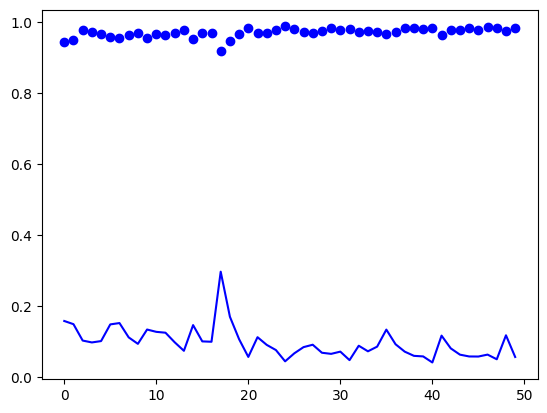

In [62]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

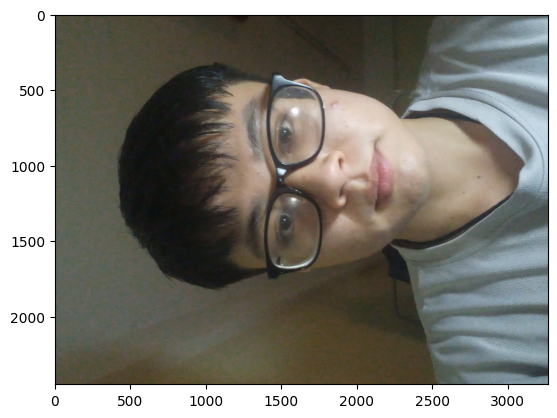

In [65]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = 'Thach.jpg'
img = load_img(url)
imshow(img)

1/1 [==============================] - 0s 35ms/step
Vuthach


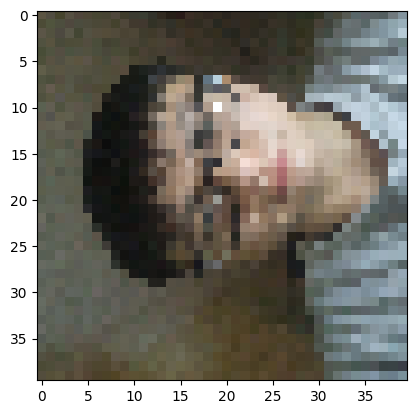

In [67]:
img = load_img(url, target_size = (40,40))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,40,40,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img), axis = -1)
if(a == array([0])):
  print("Dung")
if(a == array([1])):
  print("Ha")
if(a == array([2])):
  print("Hakiet")
if(a == array([3])):
  print("Hau")
if(a == array([4])):
  print("Hieu")

if(a == array([5])):
  print("Hoaiphong")
if(a == array([6])):
  print("Hoang")
if(a == array([7])):
  print("Huulong")
if(a == array([8])):
  print("Huynhhuy")
if(a == array([9])):
  print("Khoa")

if(a == array([10])):
  print("Khuong")
if(a == array([11])):
  print("Kiet")
if(a == array([12])):
  print("Kyanh")
if(a == array([13])):
  print("Loc")
if(a == array([14])):
  print("Luan")

if(a == array([15])):
  print("Minh")
if(a == array([16])):
  print("Ngocthach")
if(a == array([17])):
  print("Nhathuy")
if(a == array([18])):
  print("Phat")
if(a == array([19])):
  print("Phuc")

if(a == array([20])):
  print("Quanghuy")
if(a == array([21])):
  print("Quangphuc")
if(a == array([22])):
  print("Sang")
if(a == array([23])):
  print("Sontung")
if(a == array([24])):
  print("Tandat")

if(a == array([25])):
  print("Tanloc")
if(a == array([26])):
  print("Thai")
if(a == array([27])):
  print("Thang")
if(a == array([28])):
  print("Thanh")
if(a == array([29])):
  print("Thao")

if(a == array([30])):
  print("Thinh")
if(a == array([31])):
  print("Tien")
if(a == array([32])):
  print("Trong")
if(a == array([33])):
  print("Tuankiet")
if(a == array([34])):
  print("Van")

if(a == array([35])):
  print("Vuthach")
